In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json~/.kaggle/
!kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews

cp: missing destination file operand after 'kaggle.json~/.kaggle/'
Try 'cp --help' for more information.
Dataset URL: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
License(s): CC0-1.0
 72% 2.00M/2.79M [00:00<00:00, 2.86MB/s]
100% 2.79M/2.79M [00:00<00:00, 3.24MB/s]


In [3]:
!unzip '/content/womens-ecommerce-clothing-reviews.zip'

Archive:  /content/womens-ecommerce-clothing-reviews.zip
  inflating: Womens Clothing E-Commerce Reviews.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
df.head(4)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


In [27]:
df = df.iloc[:,2:]
df.drop(columns = ['Title','Recommended IND','Positive Feedback Count'], axis =1, inplace = True)
df.head(3)

,Age,Review Text,Rating,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses


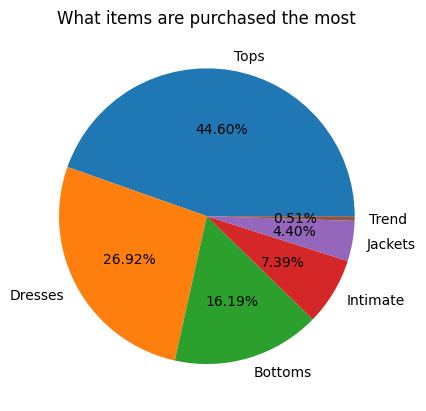

In [103]:
plt.pie(df['Department Name'].value_counts(), labels = df['Department Name'].value_counts().index, autopct = '%.2f%%')
plt.title('What items are purchased the most')
plt.show()

# EDA of the Datapoints


In [43]:
df.head(3)

,Age,Review Text,Rating,Division Name,Department Name,Class Name,Age_Bucket
0,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,Under 35
1,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,Under 35
2,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,45-60


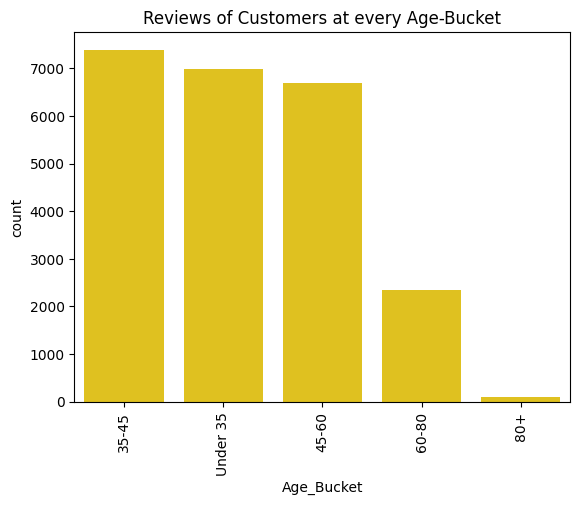

In [54]:
sns.countplot(data= df, x = df['Age_Bucket'], order = df['Age_Bucket'].value_counts().index, color = 'gold')
plt.xticks(rotation = 90)
plt.title('Reviews of Customers at every Age-Bucket')
plt.show()


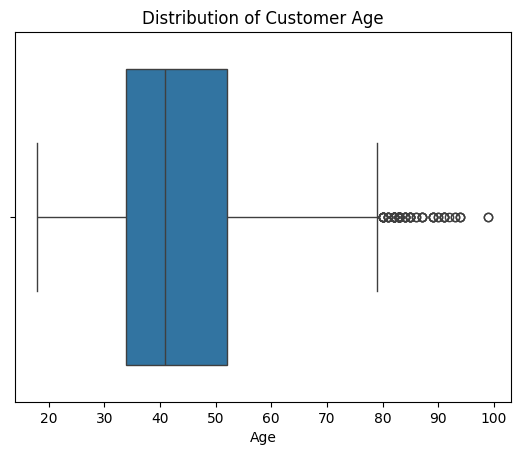

In [55]:
sns.boxplot(data = df, x = 'Age')
plt.title('Distribution of Customer Age')
plt.show()

In [37]:
df['Age_Bucket'] = np.select(condlist = [(df['Age']>80),(df['Age']>60) & (df['Age']<81),(df['Age']>45) & (df['Age']<61), (df['Age']>35) & (df['Age']<46), (df['Age']<36)],
                             choicelist=['80+','60-80','45-60','35-45','Under 35'])
df.head(3)



,Age,Review Text,Rating,Division Name,Department Name,Class Name,Age_Bucket
0,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,Under 35
1,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,Under 35
2,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,45-60


In [9]:
df[['Age_Bucket','Rating']].groupby('Age_Bucket').agg(['count','mean'])

Rating          
            count      mean
Age_Bucket                 
35-45        7391  4.191043
45-60        6682  4.201886
60-80        2338  4.280154
80+            99  4.454545
Under 35     6976  4.163847

In [ ]:
df.head(3)

,Age,Review Text,Rating,Division Name,Department Name,Class Name,Age_Bucket
0,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,Under 35
1,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,Under 35
2,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,45-60


In [10]:
df = df[['Review Text','Rating']]
df.head(2)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5


In [11]:
def new_rating(x):
  if x > 3:
    return 1
  else:
    return 0

df['Rating'] = df['Rating'].map(new_rating)
df.head(4)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1


In [12]:
x = df['Review Text']
y = df['Rating']

In [ ]:
x.shape

(23486,)

In [13]:
df_pos = df[df['Rating'] == 1]
df_neg = df[df['Rating'] == 0]

In [14]:
print(df_pos.shape)
print(df_neg.shape)

(18208, 2)
(5278, 2)


In [15]:
df_neg = df_neg.sample(df_pos.shape[0], replace = True)

In [16]:
df_neg.shape

(18208, 2)

In [17]:
data = pd.concat([df_pos,df_neg])
data.head(3)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",1


In [18]:
x = data[['Review Text']]
y = data[['Rating']]

In [19]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
def clean_text(text):
  text = str(text)
  text = text.lower()
  text = re.sub(r'[^a-z]', ' ', text)
  tokens = nltk.word_tokenize(text)
  filt_tokens = [i for i in tokens if i not in stopwords.words('english')]
  lemmatizer = WordNetLemmatizer()
  lemma_tokens = [lemmatizer.lemmatize(i) for i in filt_tokens]
  return ' '.join(lemma_tokens)

In [21]:
x['clean_text']= x['Review Text'].map(clean_text)
x.head(3)

,Review Text,clean_text
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store gla...
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,3))
x_train_tfidf = tfidf.fit_transform(x_train['clean_text'])
x_test_tfidf = tfidf.transform(x_test['clean_text'])

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
y_pred = rf.predict(x_test_tfidf)
y_train_pred = rf.predict(x_train_tfidf)

In [24]:
from sklearn.metrics import accuracy_score, classification_report
print('Test Accuracy',accuracy_score(y_test,y_pred))
print("******"*20)
print('Train Accuracy',accuracy_score(y_train, y_train_pred))
print("******"*20)
print('Test Classification Report',classification_report(y_test, y_pred))
print('-------'*25)
print('Train Classification Report', classification_report(y_train, y_train_pred))

Test Accuracy 0.9496155958264689
************************************************************************************************************************
Train Accuracy 0.9924824934779624
************************************************************************************************************************
Test Classification Report               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3644
           1       0.96      0.94      0.95      3640

    accuracy                           0.95      7284
   macro avg       0.95      0.95      0.95      7284
weighted avg       0.95      0.95      0.95      7284

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Train Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99     14564
           1       0.99 

In [25]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train_tfidf, y_train)
y_pred_bnb = bnb.predict(x_test_tfidf)
y_train_pred_bnb = bnb.predict(x_train_tfidf)

from sklearn.metrics import accuracy_score, classification_report
print('Test Accuracy',accuracy_score(y_test,y_pred_bnb))
print("******"*20)
print('Train Accuracy',accuracy_score(y_train, y_train_pred_bnb))
print("******"*20)
print('Test Classification Report',classification_report(y_test, y_pred_bnb))
print('-------'*25)
print('Train Classification Report', classification_report(y_train, y_train_pred_bnb))

Test Accuracy 0.950164744645799
************************************************************************************************************************
Train Accuracy 0.9888095565014418
************************************************************************************************************************
Test Classification Report               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3644
           1       0.96      0.94      0.95      3640

    accuracy                           0.95      7284
   macro avg       0.95      0.95      0.95      7284
weighted avg       0.95      0.95      0.95      7284

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Train Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99     14564
           1       0.98  

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(x_train_tfidf, y_train)
y_pred_knn = knn.predict(x_test_tfidf)
y_train_pred_knn = knn.predict(x_train_tfidf)

In [102]:
l1 = ['Bernoulli Naive_Bayes','Random Forest','KNeighbors Classifier']
l2 = [accuracy_score(y_test,y_pred_bnb),accuracy_score(y_test,y_pred), accuracy_score(y_test,y_pred_knn)]
l3 = [accuracy_score(y_train,y_train_pred_bnb),accuracy_score(y_train,y_train_pred), accuracy_score(y_train,y_train_pred_knn)]
df_final = pd.DataFrame({'Model': l1, 'Test Accuracy in %': [round(x*100,2) for x in l2], 'Train Accuracy in %': [round(x*100,2) for x in l3]})
df_final

,Model,Test Accuracy in %,Train Accuracy in %
0,Bernoulli Naive_Bayes,95.02,98.88
1,Random Forest,94.96,99.25
2,KNeighbors Classifier,81.74,88.59
